<a href="https://colab.research.google.com/github/saulobw/PI-STEAM/blob/main/analisis_sentimiento_steam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gzip
import ast
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

In [ ]:
#abrimos el documento en json
with open('australian_user_reviews.json', 'r', encoding= 'utf-8') as f:
  data= f.readlines()

records= [eval(line.strip()) for line in data]

In [ ]:
df_reviews= pd.DataFrame(records)
df_reviews

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [ ]:
#procedemos a desanidar
reviews= pd.json_normalize(df_reviews['reviews'].apply(lambda x:x[0] if x else None))
df_reviews=pd.concat([df_reviews, reviews], axis=1)
df_reviews= df_reviews.drop('reviews', axis=1)
df_reviews

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
2,evcentric,http://steamcommunity.com/id/evcentric,,Posted February 3.,,248820,No ratings yet,True,A suitably punishing roguelike platformer. Wi...
3,doctr,http://steamcommunity.com/id/doctr,,"Posted October 14, 2013.",,250320,2 of 2 people (100%) found this review helpful,True,This game... is so fun. The fight sequences ha...
4,maplemage,http://steamcommunity.com/id/maplemage,3 people found this review funny,"Posted April 15, 2014.",,211420,35 of 43 people (81%) found this review helpful,True,Git gud
...,...,...,...,...,...,...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,,Posted May 31.,,261030,0 of 1 people (0%) found this review helpful,True,I cried in the end its so sadding ]'; I wish l...
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,,Posted June 17.,,730,0 of 1 people (0%) found this review helpful,True,Gra naprawdę fajna.Ale jest kilka rzeczy do kt...
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,1 person found this review funny,Posted June 23.,,570,1 of 1 people (100%) found this review helpful,True,Well Done
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 21.,,233270,No ratings yet,True,this is a very fun and nice 80s themed shooter...


In [ ]:
#tomamos las columnas que necesitamos para el analisis de sentimiento
df_reviews= df_reviews[['recommend','review','item_id']].rename(columns={'recommend':'sentimiento','review':'texto'})
df_reviews.head()

,sentimiento,texto,item_id
0,True,Simple yet with great replayability. In my opi...,1250
1,True,I know what you think when you see this title ...,251610
2,True,A suitably punishing roguelike platformer. Wi...,248820
3,True,This game... is so fun. The fight sequences ha...,250320
4,True,Git gud,211420


In [ ]:
#cambiamos valores
df_reviews['sentiment']= df_reviews['sentimiento'].replace({True:0, False:1})
df_reviews

,sentimiento,texto,item_id,sentiment
0,True,Simple yet with great replayability. In my opi...,1250,0.0
1,True,I know what you think when you see this title ...,251610,0.0
2,True,A suitably punishing roguelike platformer. Wi...,248820,0.0
3,True,This game... is so fun. The fight sequences ha...,250320,0.0
4,True,Git gud,211420,0.0
...,...,...,...,...
25794,True,I cried in the end its so sadding ]'; I wish l...,261030,0.0
25795,True,Gra naprawdę fajna.Ale jest kilka rzeczy do kt...,730,0.0
25796,True,Well Done,570,0.0
25797,True,this is a very fun and nice 80s themed shooter...,233270,0.0


In [ ]:
#guardamos en formato csv
df_reviews.to_csv('reviews_csv', index=False)

In [ ]:
#leer data
df= pd.read_csv('reviews_csv', encoding='utf-8')
df

,sentimiento,texto,item_id,sentiment
0,True,Simple yet with great replayability. In my opi...,1250.0,0.0
1,True,I know what you think when you see this title ...,251610.0,0.0
2,True,A suitably punishing roguelike platformer. Wi...,248820.0,0.0
3,True,This game... is so fun. The fight sequences ha...,250320.0,0.0
4,True,Git gud,211420.0,0.0
...,...,...,...,...
25794,True,I cried in the end its so sadding ]'; I wish l...,261030.0,0.0
25795,True,Gra naprawdę fajna.Ale jest kilka rzeczy do kt...,730.0,0.0
25796,True,Well Done,570.0,0.0
25797,True,this is a very fun and nice 80s themed shooter...,233270.0,0.0


In [ ]:
print(df.shape) #verificamos tamaño del dataset

(25799, 4)


In [ ]:
df = df.dropna(how='all')

In [ ]:
df

,sentimiento,texto,item_id,sentiment
0,True,Simple yet with great replayability. In my opi...,1250.0,0.0
1,True,I know what you think when you see this title ...,251610.0,0.0
2,True,A suitably punishing roguelike platformer. Wi...,248820.0,0.0
3,True,This game... is so fun. The fight sequences ha...,250320.0,0.0
4,True,Git gud,211420.0,0.0
...,...,...,...,...
25794,True,I cried in the end its so sadding ]'; I wish l...,261030.0,0.0
25795,True,Gra naprawdę fajna.Ale jest kilka rzeczy do kt...,730.0,0.0
25796,True,Well Done,570.0,0.0
25797,True,this is a very fun and nice 80s themed shooter...,233270.0,0.0


In [ ]:
df.dtypes

sentimiento     object
texto           object
item_id        float64
sentiment      float64
dtype: object

#EDA

<Axes: title={'center': 'Conteo de Recomendaciones'}>

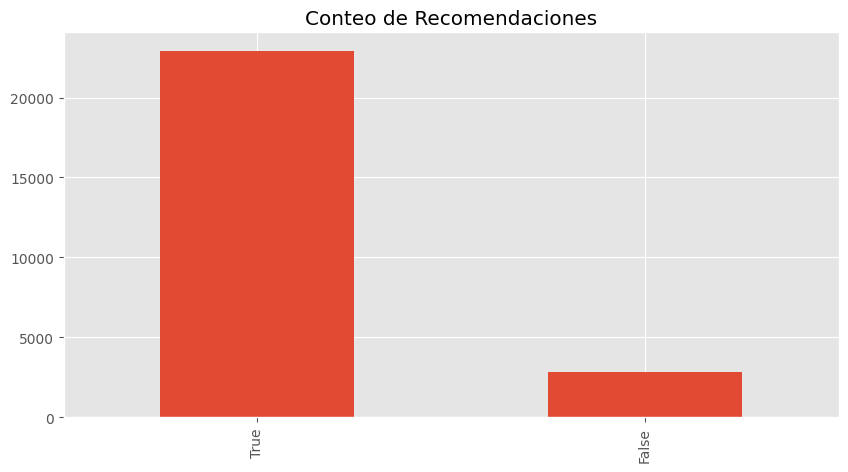

In [ ]:
#analisis de la columna sentimiento
df['sentimiento'].value_counts().plot(kind='bar', title='Conteo de Recomendaciones', figsize=(10,5))

#NLTK BASICO

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

ejemplo para ver la  exactitud al determinar el sentimiento el la frase,

In [ ]:
sia.polarity_scores('I am so happy!')
#0.682 implica que la frase es positiva para el analisis de sentimiento

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('This is the worst thing ever.') #sentimiento negativo -0.62

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
#corremos  en el dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['texto']
    myid = row['item_id']
    if isinstance(text, str):
        res[myid] = sia.polarity_scores(text)
    else:
      res[myid] = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}

  0%|          | 0/25771 [00:00<?, ?it/s]

In [ ]:
res

In [ ]:
vaders = pd.DataFrame(res).T #convertimos a dataframe y lo unimos al original
vaders = vaders.reset_index().rename(columns={'index': 'item_id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,item_id,neg,neu,pos,compound,sentimiento,texto,sentiment
0,1250.0,0.0,0.0,1.0,0.6249,True,Simple yet with great replayability. In my opi...,0.0
1,1250.0,0.0,0.0,1.0,0.6249,True,"I've played a lot of zombie games in my time, ...",0.0
2,1250.0,0.0,0.0,1.0,0.6249,True,I can't wait for Killing Floor 2! I just love ...,0.0
3,1250.0,0.0,0.0,1.0,0.6249,True,YES I RECCODMEEENDD THIS ♥♥♥♥♥ GAME,0.0
4,1250.0,0.0,0.0,1.0,0.6249,True,wow killihg Floor I like,0.0


In [ ]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.8 MB/s eta 0:00:00


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sent_pipeline('texto')

[{'label': 'POSITIVE', 'score': 0.9772146344184875}]